# 5.2 : ROC Curves for CNN and AutoGluon Models

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from autogluon.tabular import TabularPredictor
from sklearn.metrics as m


from superpac. base import get_split_mmp_indices

## Load test data and models

### For the AutoGluon models:

In [11]:
full_df = pd.read_csv('./MACCS_keys/MACCS_frag_df.csv')

ds_size = len(full_df)
zero_out, one_out, two_out = get_split_mmp_indices("./index sets for train test split", ds_size)

#zero_out_df = full_df.iloc[zero_out]
two_out_df = full_df.iloc[two_out]
#one_out_df = full_df.iloc[one_out]

#train_data = zero_out_df.drop('pKi_diff', axis=1)
test_data = two_out_df.drop('pKi_diff', axis=1)
#one_data = one_out_df.drop('pKi_diff', axis=1)

label = 'is_AC'

y_test = test_data[label]
X_test = pd.DataFrame(test_data.drop(columns=[label]))



predictor = TabularPredictor.load("./agModel_class_frag")
predictor.set_model_best('CatBoost_BAG_L2')
pred_prob_ag = predictor.predict_proba(test_data)[1]

### For the CNNs:

In [3]:
X_im_test = np.load("./split_datasets/test_X_frag_200.npy")
y_im_test = np.load("./split_datasets/test_y_frag_200.npy")



model = load_model("./M03")
preds = model.predict(X_im_test)
pred_prob_cnn = [x[1] for x in preds]

## Generating and Plotting ROC Curves

In [7]:

fpr_ag, tpr_ag, thresholds_ag = m.roc_curve(y_test, pred_prob_ag)
auc_ag = m.auc(fpr_ag, tpr_ag)
auc_ag


fpr_cnn, tpr_cnn, thresholds_cnn = m.roc_curve(y_im_test, pred_prob_cnn)
auc_cnn = m.auc(fpr_cnn, tpr_cnn)
auc_cnn

0.8038001507636859

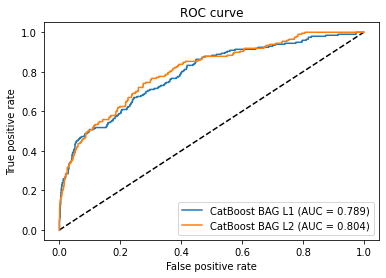

"\nplt.figure(2)\nplt.xlim(0, 0.2)\nplt.ylim(0.8, 1)\nplt.plot([0, 1], [0, 1], 'k--')\nplt.plot(fpr1, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))\nplt.plot(fpr2, tpr_rf, label='M11 (AUC = {:.3f})'.format(auc_rf))\nplt.xlabel('False positive rate')\nplt.ylabel('True positive rate')\nplt.title('ROC curve (zoomed in at top left)')\nplt.legend(loc='best')\nplt.show()"

In [8]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_ag, tpr_ag, label='AutoGluon (AUC = {:.3f})'.format(auc_ag))
plt.plot(fpr_cnn, tpr_cnn, label="CNN (AUC = {:.3f})".format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

""" # Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr2, tpr_rf, label='M11 (AUC = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()"""